In [1]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import scanpy as scר
import pandas as pd
from data_gen import *
from visualizations import *
from datasets import *

import squidpy as sq


In [9]:
from scipy.stats import entropy

def count_hours_per_cluster(adata, nclusters=10):
    hours_array = np.zeros((6,nclusters))
    ct_list = ['02','06','10','14','18','22']
    var_list = [ ]
    ent_list = [ ]
    angles = (np.array(range(6))*2*np.pi)/6
    for i in range(nclusters):
        adata_tmp = (adata[adata.obs['leiden'].isin([str(i)])])
        print("Cluster " +str(i) + " contains " +str(adata_tmp.X.shape[0]) + " samples")
        for j in range(6):
            adata_tmp_2 = (adata_tmp[adata_tmp.obs['CT'].isin([ct_list[j]])])
            hours_array[j,i] = adata_tmp_2.X.shape[0]
        hours_array[:,i] = hours_array[:,i]/hours_array[:,i].sum()
        var_list.append(circular_mean(angles,hours_array[:,i])[1])
        ent_list.append(entropy(hours_array[:,i]))
    hours_array = hours_array.T
    df = pd.DataFrame({'02': hours_array[:,0], '06': hours_array[:,1], '10': hours_array[:,2] ,
                       '14':hours_array[:,3],'18':hours_array[:,4],'22':hours_array[:,5]})
    sns.set(font_scale=1.2)
    cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
    ax = sns.heatmap(df, annot=hours_array, vmin=0, vmax=0.4,cmap ='RdBu_r'
    )
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=17)
    plt.title('Percentage of cells from each timepoint')
    plt.ylabel("Leiden", fontsize=20)
    plt.xlabel("Timepoint", fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.tick_params(axis='both', which='minor', labelsize=12)

    plt.show(
    )
    var_list = np.array(var_list)
    ent_list = np.array(ent_list)
    print("Mean variance: " +str(var_list.mean()))
    print("Mean entropy: " +str(ent_list.mean()))
    pass


In [2]:
from scipy.stats import entropy

def count_hours_per_cluster(adata, nclusters=10):
    hours_array = np.zeros((6,nclusters))
    ct_list = ['02','06','10','14','18','22']
    var_list = [ ]
    ent_list = [ ]
    angles = (np.array(range(6))*2*np.pi)/6
    for i in range(nclusters):
        adata_tmp = (adata[adata.obs['leiden'].isin([str(i)])])
        print("Cluster " +str(i) + " contains " +str(adata_tmp.X.shape[0]) + " samples")
        for j in range(6):
            adata_tmp_2 = (adata_tmp[adata_tmp.obs['CT'].isin([ct_list[j]])])
            hours_array[j,i] = adata_tmp_2.X.shape[0]
        hours_array[:,i] = hours_array[:,i]/hours_array[:,i].sum()
        var_list.append(circular_mean(angles,hours_array[:,i])[1])
        ent_list.append(entropy(hours_array[:,i]))
    hours_array = hours_array.T
    df = pd.DataFrame({'02': hours_array[:,0], '06': hours_array[:,1], '10': hours_array[:,2] ,
                       '14':hours_array[:,3],'18':hours_array[:,4],'22':hours_array[:,5]})
    sns.set(font_scale=1.2)
    cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
    ax = sns.heatmap(df, annot=hours_array, vmin=0, vmax=0.4,cmap ='RdBu_r'
    )
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=17)
    plt.title('Percentage of cells from each timepoint')
    plt.ylabel("Leiden", fontsize=20)
    plt.xlabel("Timepoint", fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.tick_params(axis='both', which='minor', labelsize=12)

    plt.show(
    )
    var_list = np.array(var_list)
    ent_list = np.array(ent_list)
    print("Mean variance: " +str(var_list.mean()))
    print("Mean entropy: " +str(ent_list.mean()))
    pass


In [3]:
import pandas as pd
print(pd.__version__)

1.3.5


In [4]:
import cyclum.tuning
import cyclum.models


In [5]:
adata =  read_all_scn()
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


/Users/jonathankarin/.conda/envs/cyclum/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'CT' as categorical
/Users/jonathankarin/.conda/envs/cyclum/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'ST' as categorical
/Users/jonathankarin/.conda/envs/cyclum/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be remov

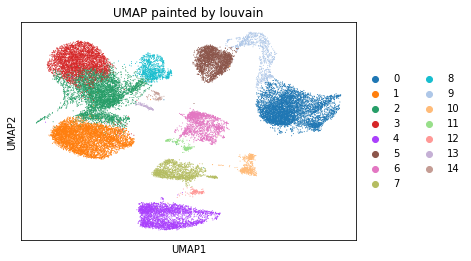

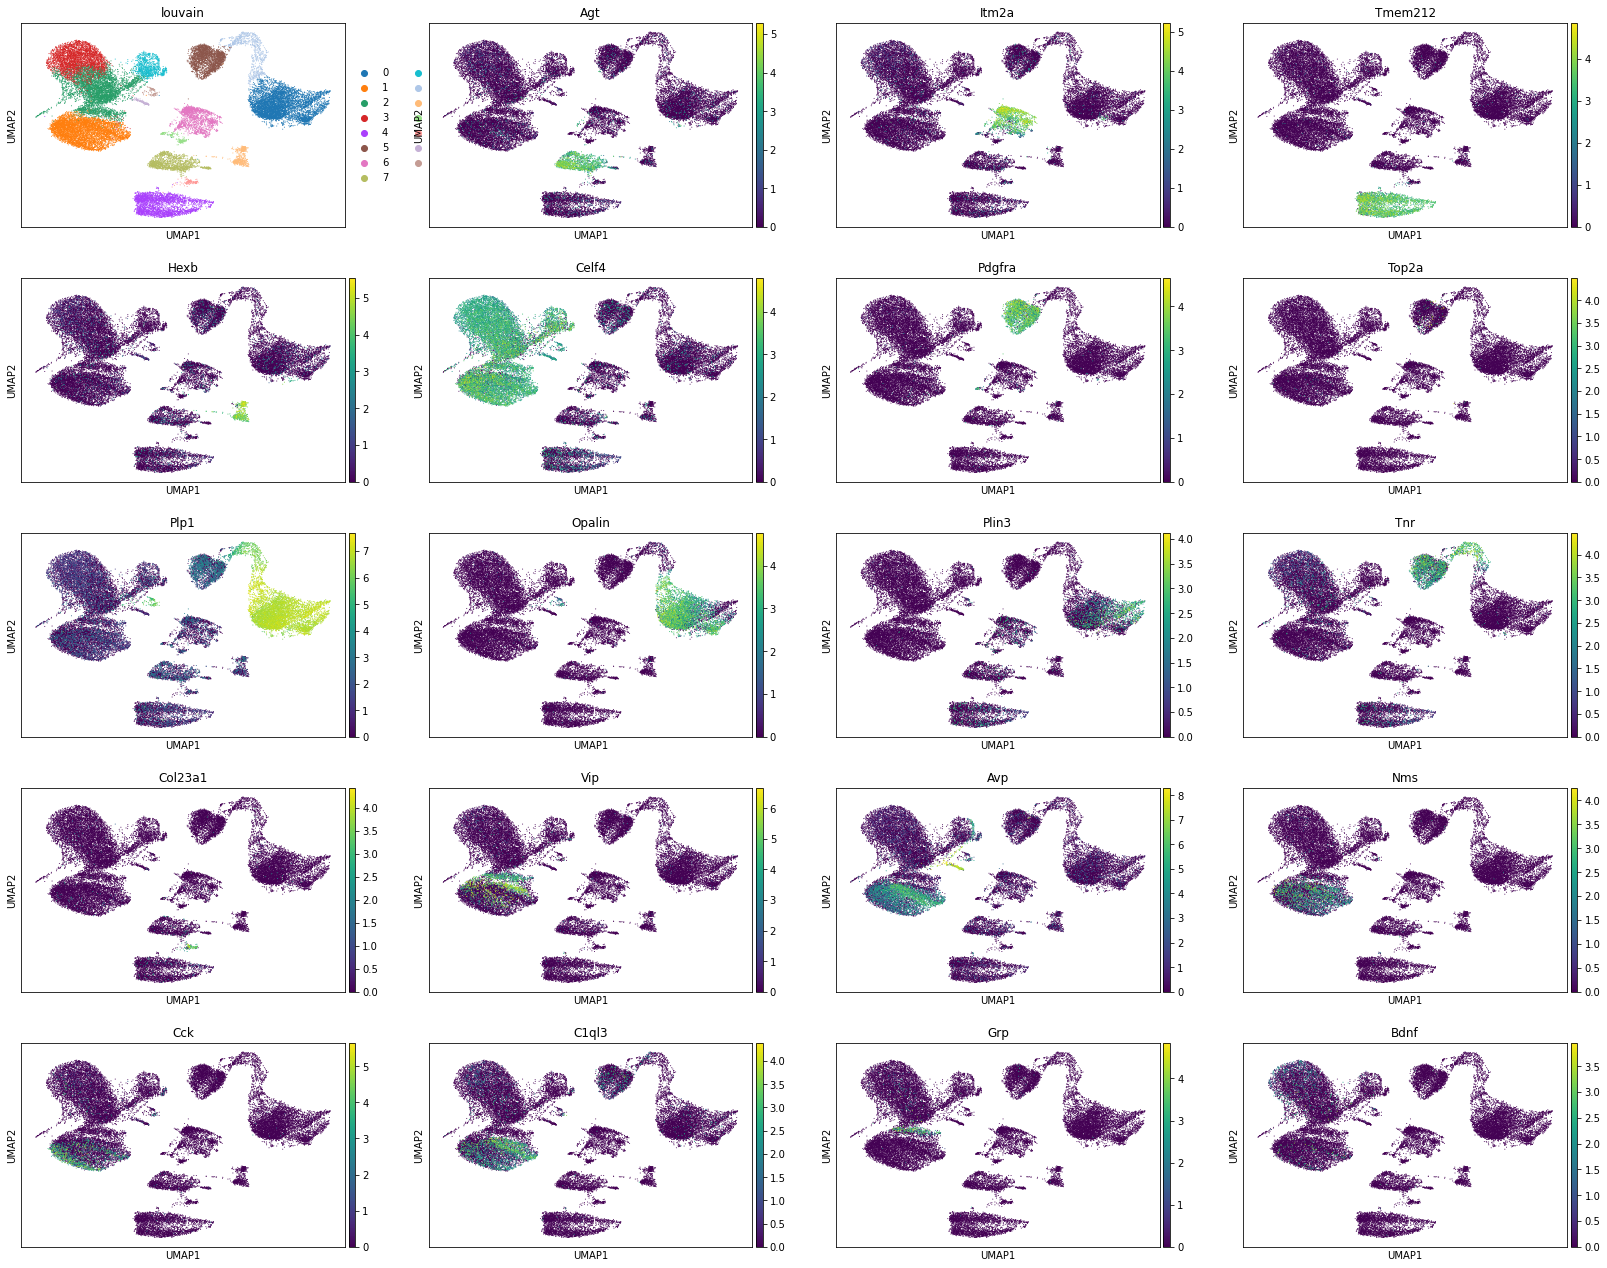

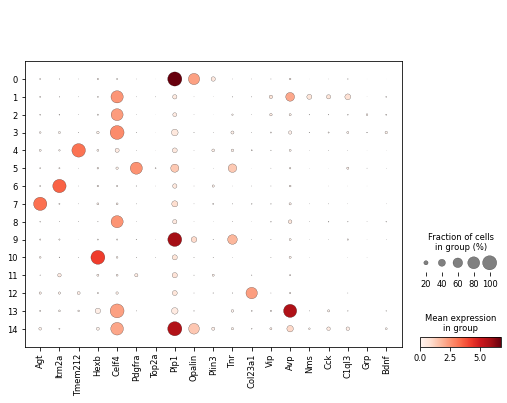

In [6]:
sc.tl.louvain(adata, resolution=0.5)
sc.tl.umap(adata)
sc.pl.umap(adata, color='louvain' , title=("UMAP painted by louvain"))
marker_genes = ['Agt', 'Itm2a','Tmem212','Hexb','Celf4','Pdgfra','Top2a','Plp1','Opalin','Plin3','Tnr','Col23a1','Vip','Avp','Nms','Cck','C1ql3','Grp','Bdnf']
sc.pl.umap(adata, color=['louvain']+marker_genes)
sc.pl.dotplot(adata, marker_genes, groupby='louvain')


In [7]:
new_cluster_names = [
    'Oligodendrocytes1',
    'Neurons1',
    'Neurons2',
    'Neurons3',
    'Ependymal',
    'NG2',
    'Endothelial',
    'Astrocytes',
    'Neurons4',
    'Oligodendrocytes2',
    'Microglia',
    'not_real',
    'Tanycytes',
    'Neurons5',
        'Neurons6']
adata.rename_categories('louvain', new_cluster_names)


/Users/jonathankarin/.conda/envs/cyclum/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [8]:
cluster_list = [
    'Neurons1',
    'Neurons2',
    'Neurons3',
    'Neurons4',
    'Neurons5',
    'Neurons6']

adata_neurons = (adata[adata.obs['louvain'].isin(cluster_list)])
sc.pp.highly_variable_genes(adata_neurons, n_top_genes=1000)
adata_neurons = sort_data_crit(adata=adata_neurons.copy(), crit='CT',
                             crit_list=['02', '06', '10', '14', '18', '22'])
adata_neurons_filtered = adata_neurons.copy()
adata_neurons

Trying to set attribute `._uns` of view, copying.


View of AnnData object with n_obs × n_vars = 14860 × 20299
    obs: 'CT', 'ST', 'day', 'batch', 'n_genes', 'n_counts', 'louvain'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'pca', 'neighbors', 'louvain', 'umap', 'louvain_colors', 'hvg'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

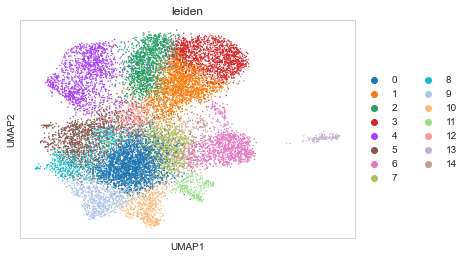

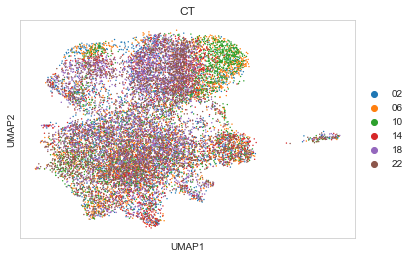

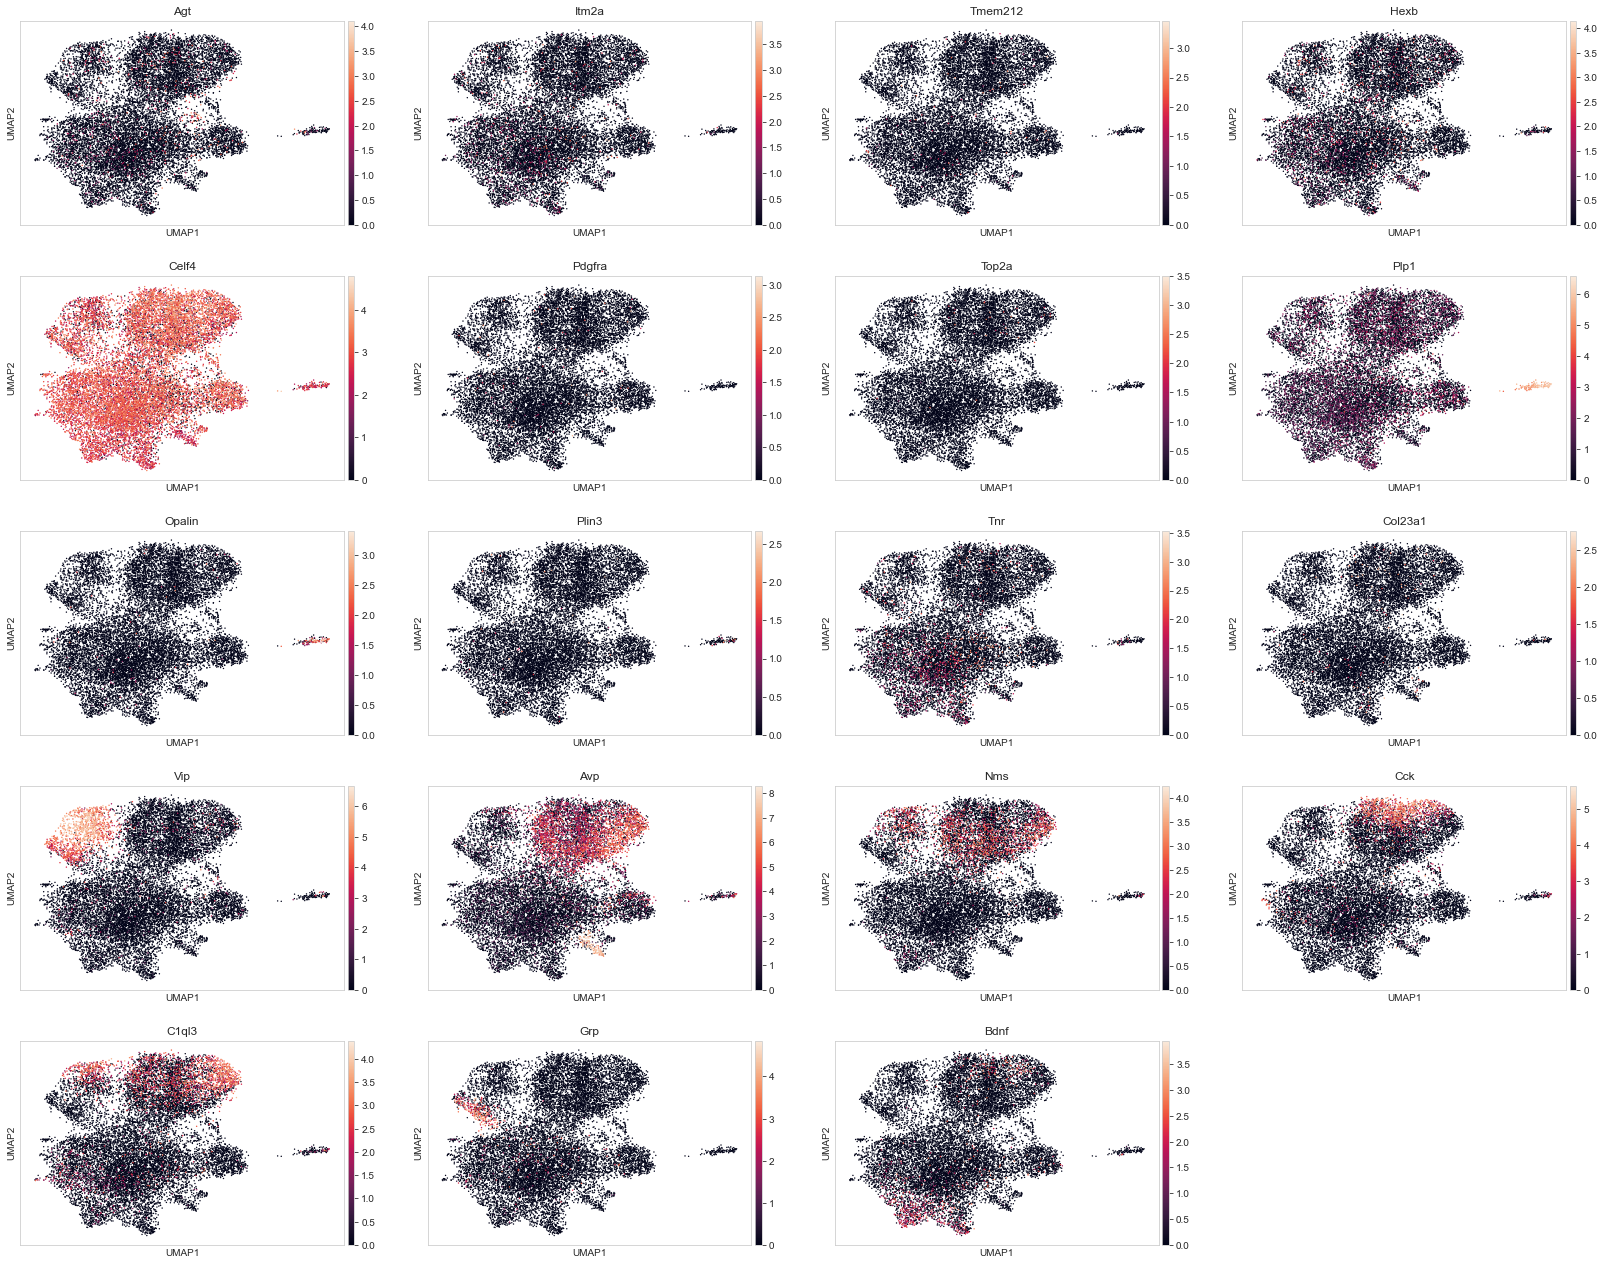

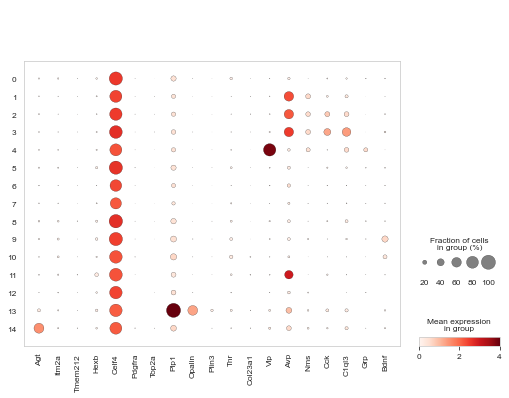

Cluster 0 contains 2491 samples
Cluster 1 contains 1780 samples
Cluster 2 contains 1421 samples
Cluster 3 contains 1413 samples
Cluster 4 contains 1337 samples
Cluster 5 contains 1278 samples
Cluster 6 contains 1177 samples
Cluster 7 contains 1048 samples
Cluster 8 contains 771 samples
Cluster 9 contains 766 samples
Cluster 10 contains 523 samples
Cluster 11 contains 314 samples
Cluster 12 contains 305 samples
Cluster 13 contains 121 samples


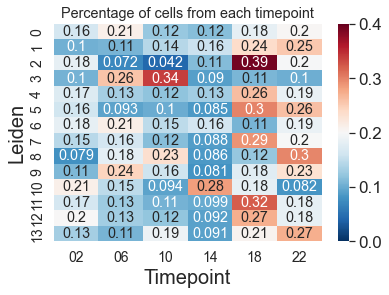

Mean variance: 0.8076460274822355
Mean entropy: 1.7054586416773465


In [10]:
sns.set_style("whitegrid")
sns.set_context(font_scale=1.5, rc={"lines.linewidth": 1.5})
sc.tl.pca(adata_neurons, svd_solver='arpack')
sc.pp.neighbors(adata_neurons, n_neighbors=10, n_pcs=40)
sc.tl.leiden(adata_neurons, resolution=1)
sc.tl.umap(adata_neurons)
sc.pl.umap(adata_neurons, color='leiden')# , title=("UMAP painted by louvain"))
sc.pl.umap(adata_neurons, color='CT')
sc.pl.umap(adata_neurons, color=marker_genes)
sns.set_style("whitegrid")
sns.set_context(font_scale=2, rc={"lines.linewidth": 1.5})
sc.pl.dotplot(adata_neurons, marker_genes, groupby='leiden', vmax=4,dot_max=1)
count_hours_per_cluster(adata_neurons, nclusters=14)


In [5]:
r_genes = ['Bmal1','Dbp','Nr1d1','Per2','Ciart','Nr1d2','Per1','Tef','Ahsa2','Cct8a','Hsp90aa1','Hsp90ab1','Hsph1']
r_genes2 = ['Dbp','Nr1d1','Per2','Ciart','Nr1d2','Per1','Tef','Ahsa2','Hsp90aa1','Hsp90ab1','Hsph1']
type_genes = ['Agt', 'Itm2a','Tmem212','Hexb','Celf4','Pdgfra','Top2a','Plp1','Opalin','Plin3','Tnr','Col23a1','Vip','Avp','Nms','Cck','C1ql3','Grp','Bdnf']
def pre_processes_for_cyclum(adata_tmp, r_genes,type_genes):
    sc.pp.highly_variable_genes(adata_tmp, n_top_genes=3000)#min_mean=0.0125, max_mean=3, min_disp=0.5)
    for gene in r_genes: # Make sure that the rhytmic and type markers are not filtered out
        adata_tmp.var.highly_variable[gene]=True
    for gene in type_genes:
        adata_tmp.var.highly_variable[gene]=True
    adata_tmp = adata_tmp[:, adata_tmp.var.highly_variable]
    return adata_tmp
